# Logistic Regression from scratch in Python

## VIDEO :

In [1]:
# Logistic Regression

from IPython.display import HTML,IFrame
url1 = 'https://drive.google.com/file/d/'
url2 = '/preview'
id = '1QS0yUYBp9VMyRKyxhGG6zOojJ5w8BAp9'
url =url1+id+url2
IFrame(url,width="600",height="400")

In [2]:
from IPython.display import HTML,IFrame
url1 = 'https://drive.google.com/file/d/'
url2 = '/preview'
id = '1tNOnV3lKylO7Pjyqj9n6FBDUxDgC7cRw'
url =url1+id+url2
IFrame(url,width="600",height="400")

## Data set
We will use the well known Iris data set. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. To simplify things, we take just the first two feature columns. Also, the two non-linearly separable classes are labeled with the same category, ending up with a binary classification problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## Algorithm
Given a set of inputs X, we want to assign them to one of two possible categories (0 or 1). Logistic regression models the probability that each input belongs to a particular category.

## Hypothesis

A function takes inputs and returns outputs. To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of X. There are many functions that meet this description, but the used in this case is the logistic function. From here we will refer to it as sigmoid.

![sigmoid](img/sigmoid.png)
                                    
![Hypothesis](img/hyp.png)
                                     

## Loss function

Functions have parameters/weights (represented by theta in our notation) and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function, defined as:

![loss](img/loss.png)

## Gradient descent

Our goal is to minimize the loss function and the way we have to achive it is by increasing/decreasing the weights, i.e. fitting them. The question is, how do we know what parameters should be biggers and what parameters should be smallers? The answer is given by the derivative of the loss function with respect to each weight. It tells us how loss would change if we modified the parameters.

![gradient](img/gradient.png)

## Predictions

By calling the sigmoid function we get the probability that some input x belongs to class 1. Let’s take all probabilities ≥ 0.5 = class 1 and all probabilities < 0 = class 0. This threshold should be defined depending on the business problem we were working.

## Implementation

In [2]:
iris = datasets.load_iris()

In [8]:
print(iris.feature_names, iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [9]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

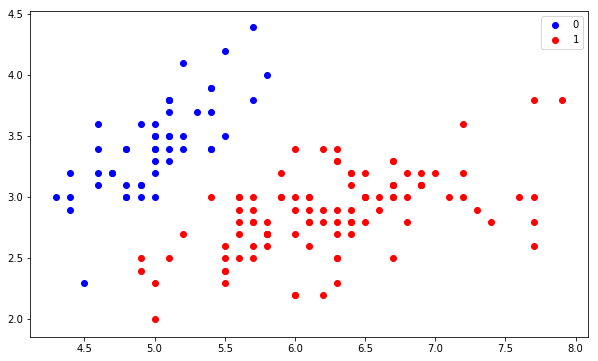

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [27]:
# Class

class LogisticRegression:
    
    def __init__(self, lr=0.01, num_iter=10000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    # Ones column
    def add_intercept(self, X):
        # Create ones matrix as per no of rows
        ones = np.ones((X.shape[0],1))
        return np.concatenate((ones,X),axis=1)
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        
        if self.fit_intercept:
            X = self.add_intercept(X)
            
        # Initialize weights
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.iter):
            z = np.dot(X, self.theta)
            hypothesis = self.sigmoid(z)
            gradient = np.dot(X.T, (hypothesis - y)) / y.size
            self.theta = self.theta - (self.lr * gradient)
            
            z = np.dot(X, self.theta)
            hypothesis = self.sigmoid(z)
            cost = self.cost(hypothesis, y)
            
            if self.verbose==True and i%5000==0:
                print(f'loss: {cost}')
    def probs(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        return self.sigmoid(np.dot(X, self.theta))
        
    def predict(self,X):
        
        return self.probs(X).round()
    

In [28]:
model = LogisticRegression(lr=0.1, num_iter=300000, verbose=True)

In [29]:
%time model.fit(X, y)

loss: 0.6106904453410645
loss: 0.042013748854775095
loss: 0.03432718644226483
loss: 0.030966019809573885
loss: 0.028786652134558176
loss: 0.0271143512909975
loss: 0.025718548517683595
loss: 0.02449982232632176
loss: 0.02340842758463659
loss: 0.022416534570834222
loss: 0.021507024522720526
loss: 0.020668414973470113
loss: 0.01989236818160483
loss: 0.01917239701317689
loss: 0.0185031664409479
loss: 0.01788010651591561
loss: 0.01729919359204133
loss: 0.01675682399956533
loss: 0.016249738703587736
loss: 0.01577497587310786
loss: 0.015329838490314565
loss: 0.014911869912046353
loss: 0.014518833591009708
loss: 0.014148695026157858
loss: 0.013799605037762763
loss: 0.013469884003544182
loss: 0.013158006956155592
loss: 0.012862589553472612
loss: 0.012582374964505361
loss: 0.012316221707331737
loss: 0.012063092454345658
loss: 0.011822043796370833
loss: 0.011592216936374881
loss: 0.0113728292676773
loss: 0.01116316678090666
loss: 0.010962577237894787
loss: 0.010770464048285666
loss: 0.01058628078

In [30]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [31]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

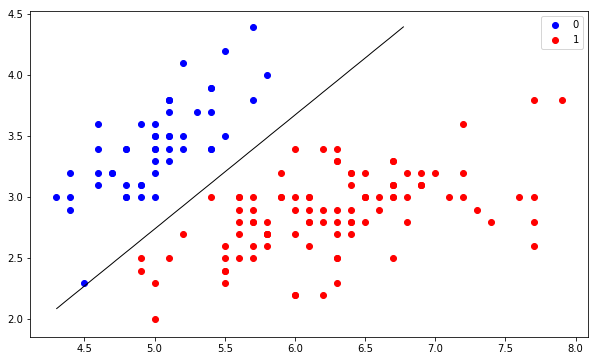

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.probs(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');